# Assignment 4: Question 3
## Bikeshare

Beginning with the bikeshare_final.ipynb notebook in the Week7and8 folder, create a bikeshare system that models THREE locations (rather than just two).  Assuming the locations are called A, B, and C, use the following parameters:  total number of bikes = 100, p_AB = 0.3, p_BA=0.2, p_AC = 0.4, p_CA=0.1, p_BC=0.35, p_CB=0.15.  Try to determine the optimum initial configuration of the 100 bikes between the three locations such that the number of unsatisfied customers will be minimized over a three-hour period of bike sharing.

As a suggestion, try some configurations in steps of 10 bikes for the initial configuration, for example, try A = 10, B = 30, C = 60, and compare that to A = 10, B = 60, C = 30.  This may help you understand where the optimum configuration might be located in the (A,B,C) space.


*Modeling and Simulation in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# import functions from modsim
from modsim import *

In [3]:
def step(state, p_AB, p_BA, p_AC, p_CA, p_BC, p_CB):
    """Simulate one time step.
    
    state: bikeshare State object
    p_AB: probability of an A->B ride
    p_BA: probability of a B->A ride
    p_AC: probability of an A->C ride
    p_CA: probability of a C->A ride
    p_BC: probability of an B->C ride
    p_CB: probability of a C->B ride
    """
    if flip(p_AB):
        A_to_B(state)
    
    if flip(p_BA):
        B_to_A(state)
        
    if flip(p_AC):
        A_to_C(state)
    
    if flip(p_CA):
        C_to_A(state)
        
    if flip(p_BC):
        B_to_C(state)
    
    if flip(p_CB):
        C_to_B(state)
        
def A_to_B(state):
    """Move one bike from A to B.
    
    state: bikeshare State object
    """
    if state.A == 0:
        state.A_empty += 1
        return
    state.A -= 1
    state.B += 1
    
def B_to_A(state):
    """Move one bike from B to A.
    
    state: bikeshare State object
    """
    
    if state.B == 0:
        state.B_empty += 1
        return
    state.B -= 1
    state.A += 1
    
def A_to_C(state):
    """Move one bike from A to C.
    
    state: bikeshare State object
    """
    if state.A == 0:
        state.A_empty += 1
        return
    state.A -= 1
    state.C += 1
    
def C_to_A(state):
    """Move one bike from C to A.
    
    state: bikeshare State object
    """
    
    if state.C == 0:
        state.C_empty += 1
        return
    state.C -= 1
    state.A += 1
    
def B_to_C(state):
    """Move one bike from B to C.
    
    state: bikeshare State object
    """
    if state.B == 0:
        state.B_empty += 1
        return
    state.B -= 1
    state.C += 1
    
def C_to_B(state):
    """Move one bike from C to B.
    
    state: bikeshare State object
    """
    
    if state.C == 0:
        state.C_empty += 1
        return
    state.C -= 1
    state.B += 1


In [4]:
def run_simulation(state, p1, p2, p3, p4, p5, p6, num_steps, do_plot=True):
    """Simulate the given number of time steps.
    
    state: State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    results_A = TimeSeries()
    results_A[0] = state.A
    results_B = TimeSeries()
    results_B[0] = state.B
    results_C = TimeSeries()
    results_C[0] = state.C
    results_A_unsatisfied = TimeSeries()
    results_A_unsatisfied[0] = state.A_empty
    results_B_unsatisfied = TimeSeries()
    results_B_unsatisfied[0] = state.B_empty
    results_C_unsatisfied = TimeSeries()
    results_C_unsatisfied[0] = state.C_empty
    
    for i in range(num_steps):
        step(state, p1, p2, p3, p4, p5, p6)
        results_A[i+1] = state.A
        results_B[i+1] = state.B
        results_C[i+1] = state.C
        results_A_unsatisfied[i+1] = state.A_empty
        results_B_unsatisfied[i+1] = state.B_empty
        results_C_unsatisfied[i+1] = state.C_empty
        
    if (do_plot):
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        ax[0].plot(results_A, label='A')
        ax[0].plot(results_B, label='B')
        ax[0].plot(results_C, label='C')
        ax[0].set_xlabel('Time step (min)')
        ax[0].set_ylabel('Number of bikes')
        ax[0].legend()
        ax[1].plot(results_A_unsatisfied, label='A')
        ax[1].plot(results_B_unsatisfied, label='B')
        ax[1].plot(results_C_unsatisfied, label='C')
        ax[1].set_xlabel('Time step (min)')
        ax[1].set_ylabel('Number of unsatisfied customers')
        ax[1].legend()
        plt.show()
    
    return results_A_unsatisfied[num_steps-1] + results_B_unsatisfied[num_steps-1] + results_C_unsatisfied[num_steps-1]

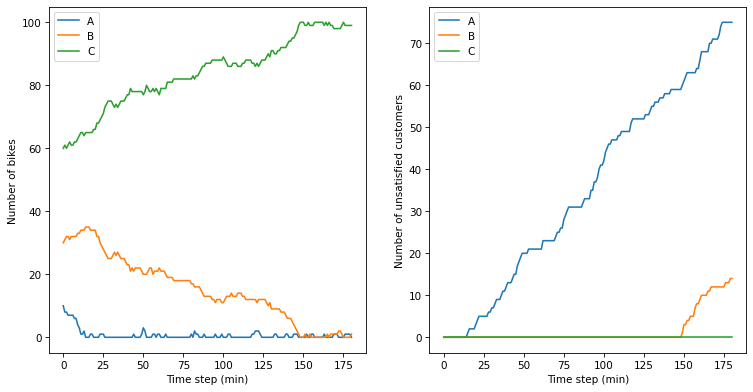

0 0 100
Average unsatisfied customers:  149.9
0 10 90
Average unsatisfied customers:  136.5
0 20 80
Average unsatisfied customers:  118.3
0 30 70
Average unsatisfied customers:  100.3
0 40 60
Average unsatisfied customers:  93.5
0 50 50
Average unsatisfied customers:  88.8
0 60 40
Average unsatisfied customers:  74.2
0 70 30
Average unsatisfied customers:  68.3
0 80 20
Average unsatisfied customers:  71.7
0 90 10
Average unsatisfied customers:  74.9
0 100 0
Average unsatisfied customers:  73.8
10 0 90
Average unsatisfied customers:  129.5
10 10 80
Average unsatisfied customers:  127.9
10 20 70
Average unsatisfied customers:  100.5
10 30 60
Average unsatisfied customers:  82.4
10 40 50
Average unsatisfied customers:  71.1
10 50 40
Average unsatisfied customers:  63.9
10 60 30
Average unsatisfied customers:  56.8
10 70 20
Average unsatisfied customers:  63.8
10 80 10
Average unsatisfied customers:  64.2
10 90 0
Average unsatisfied customers:  62.4
20 0 80
Average unsatisfied customers:  

In [50]:
p_AB, p_BA, p_AC, p_CA, p_BC, p_CB = .3, .2, .4, .1, .35, .15

# Basic Test
bikeshare = State(A=10, B=30, C=60,
                  A_empty=0, B_empty=0, C_empty=0)
do_plot = True
total_unsatisfied = run_simulation(bikeshare, p_AB, p_BA, p_AC, p_CA, p_BC, p_CB, 180, do_plot)

N_slots = 100

nstart = []
tu_avg = {}
graphs_based_on_A = {}

num_sims = 10
for N_start_A in range(0, N_slots+1, 10):
    for N_start_B in range(0, N_slots - N_start_A +1, 10):
        N_start_C = N_slots - N_start_A - N_start_B

        print(N_start_A, N_start_B, N_start_C)

        tu_sum = 0

        for j in range(num_sims):
            bikeshare = State(A=N_start_A, B=N_start_B, C=N_start_C,
                              A_empty=0, B_empty=0, C_empty=0)
            do_plot = False
            # it doesn't specify in the unit for the probability but based on the explaination in bikeshare.ipynb, I'm going to assume that each step is 1 minute, meaning that 3 hours would be 180 steps.
            total_unsatisfied = run_simulation(bikeshare, p_AB, p_BA, p_AC, p_CA, p_BC, p_CB, 180, do_plot)

            # print("Total unsatisfied customers: ", total_unsatisfied)
            tu_sum += total_unsatisfied

        print("Average unsatisfied customers: ", tu_sum/(1.0*num_sims))
        tu_avg[N_start_A, N_start_B, N_start_C] = tu_sum/(1.0*num_sims)

print(f"The lowest average unsatisfied customers is: {min(tu_avg.values())} with an (A,B,C) of {min(tu_avg, key=tu_avg.get)}")

When working in groups of 10 bikes for initial configurations: 70 bikes at location A, 30 bikes at location B, and 0 bikes at location C yields the the lowest average number of unsatisfied customers over a 3 hour period.

Because of this I'm going to set it up run simulations near those numbers in steps of 1 to find the best configuration.

In [52]:
p_AB, p_BA, p_AC, p_CA, p_BC, p_CB = .3, .2, .4, .1, .35, .15

N_slots = 100

nstart = []
tu_avg = {}
graphs_based_on_A = {}

num_sims = 10
for N_start_A in range(65, 85+1):
    for N_start_B in range(15, N_slots - N_start_A +1):
        N_start_C = N_slots - N_start_A - N_start_B

        print(N_start_A, N_start_B, N_start_C)

        tu_sum = 0

        for j in range(num_sims):
            bikeshare = State(A=N_start_A, B=N_start_B, C=N_start_C,
                              A_empty=0, B_empty=0, C_empty=0)
            do_plot = False
            # it doesn't specify in the unit for the probability but based on the explaination in bikeshare.ipynb, I'm going to assume that each step is 1 minute, meaning that 3 hours would be 180 steps.
            total_unsatisfied = run_simulation(bikeshare, p_AB, p_BA, p_AC, p_CA, p_BC, p_CB, 180, do_plot)

            # print("Total unsatisfied customers: ", total_unsatisfied)
            tu_sum += total_unsatisfied

        print("Average unsatisfied customers: ", tu_sum/(1.0*num_sims))
        tu_avg[N_start_A, N_start_B, N_start_C] = tu_sum/(1.0*num_sims)

print(f"The lowest average unsatisfied customers is: {min(tu_avg.values())} with an (A,B,C) of {min(tu_avg, key=tu_avg.get)}")

65 15 20
Average unsatisfied customers:  22.0
65 16 19
Average unsatisfied customers:  17.1
65 17 18
Average unsatisfied customers:  13.3
65 18 17
Average unsatisfied customers:  23.2
65 19 16
Average unsatisfied customers:  16.7
65 20 15
Average unsatisfied customers:  14.9
65 21 14
Average unsatisfied customers:  9.8
65 22 13
Average unsatisfied customers:  14.1
65 23 12
Average unsatisfied customers:  12.6
65 24 11
Average unsatisfied customers:  14.6
65 25 10
Average unsatisfied customers:  11.3
65 26 9
Average unsatisfied customers:  7.6
65 27 8
Average unsatisfied customers:  12.2
65 28 7
Average unsatisfied customers:  9.5
65 29 6
Average unsatisfied customers:  8.0
65 30 5
Average unsatisfied customers:  10.5
65 31 4
Average unsatisfied customers:  10.5
65 32 3
Average unsatisfied customers:  9.8
65 33 2
Average unsatisfied customers:  7.4
65 34 1
Average unsatisfied customers:  13.4
65 35 0
Average unsatisfied customers:  10.6
66 15 19
Average unsatisfied customers:  18.4
66 1

 81 bikes at location A, 19 bikes at location B, and 0 bikes at location C yielded the lowest average number of unsatisfied customers over a 3 hour period. This should probably be run with more simulations per set of distribution of bikes.